In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df.shape

(50000, 2)

In [5]:
import nltk
from nltk.corpus import stopwords

In [6]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
def clean_review(review):
    str = " ".join(word for word in review.split() if word.lower() not in stopwords.words("english"))
    return str

In [10]:
df["review"] = df["review"].apply(clean_review)

In [13]:
from wordcloud import WordCloud

In [12]:
pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500)
X = vectorizer.fit_transform(df['review']).toarray()  # Ensure to replace 'text_column' with the actual column name containing the text.


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)


In [92]:
print(type(X_train), X_train.dtype)  # Should be <class 'numpy.ndarray'> float64 or float32
print(type(y_train), y_train.dtype)  # Should be <class 'pandas.core.series.Series'> int64 or similar


<class 'numpy.ndarray'> float64
<class 'pandas.core.series.Series'> int64


In [93]:
X_train.shape

(40000, 2500)

In [94]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [95]:
model.predict(X_test)

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

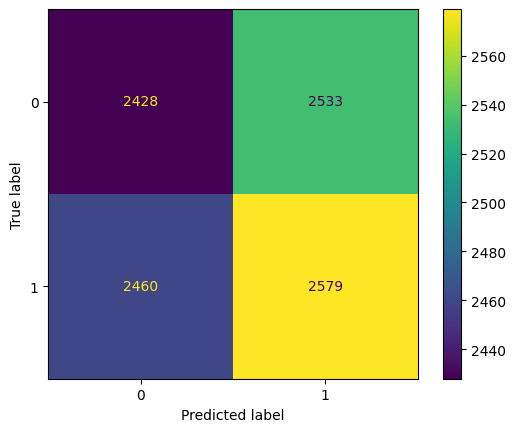

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, predict, labels=model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()  # This renders the confusion matrix as a plot


In [99]:
import pickle as pk

In [101]:
pk.dump(model,open("model.pkl","wb"))